In [1]:
import scimap as sm
import anndata as ad
import pandas as pd
import napari



Running SCIMAP  2.3.4


In [4]:
adata = ad.read_h5ad('/Users/jessica/Intership_ss2025/scimap/scimapData.h5ad')
adata.obs['imageid'] = 'reg003_X01_Y01_Z01'
adata
channel_names = ['DAPI', 'Ki67', 'Keratin5', 'CD68', 'Podoplanin', 'SMA', 'CD107a',
       'CLDN17', 'CD34', 'HLA-DR']


In [5]:
image_path = '/Users/jessica/Intership_ss2025/scimap/reg003_X01_Y01_Z01.tif'
sm.pl.napariGater(image_path, adata) # new method

Initializing...
Initializing gates with GMM (per image)...


/var/folders/wy/2l_3rcts6msc4npdgmjp0dxm0000gn/T/ipykernel_50934/2460670746.py:2: UserWarning:

NOTE: napariGater() is currently in beta testing. If you encounter any issues, please report them at: https://github.com/labsyspharm/scimap/issues



Computing gates:   0%|          | 0/9 [00:00<?, ?it/s]

Loading image data...
Calculating contrast settings...


Calculating contrast for reg003_X01_Y01_Z01:   0%|          | 0/3 [00:00<?, ?it/s]

Saved contrast settings for reg003_X01_Y01_Z01 with 3 channels
Initialization completed in 0.42 seconds
Opening napari viewer...


ValueError: length of [(0.0, 165.2), (0.0, 1.4), (0.0, 1.4)] must equal 10

2025-05-23 21:04:03.536 python[50934:16109941] +[IMKClient subclass]: chose IMKClient_Modern
2025-05-23 21:04:03.536 python[50934:16109941] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [7]:
adata.uns['gates']

,reg003_X01_Y01_Z01
Ki67,0.418007
Keratin5,0.240877
CD68,1.747285
Podoplanin,0.488110
SMA,1.461346
CD107a,0.944036
CLDN17,1.214001
CD34,0.593524
HLA-DR,0.746966


In [8]:
adata.obs['imageid']


0       reg003_X01_Y01_Z01
1       reg003_X01_Y01_Z01
2       reg003_X01_Y01_Z01
3       reg003_X01_Y01_Z01
4       reg003_X01_Y01_Z01
               ...        
1443    reg003_X01_Y01_Z01
1444    reg003_X01_Y01_Z01
1445    reg003_X01_Y01_Z01
1446    reg003_X01_Y01_Z01
1447    reg003_X01_Y01_Z01
Name: imageid, Length: 1448, dtype: object

In [9]:
gates_df = adata.uns['gates'].copy()
gates_df.index.name = 'markers'
gates_df.reset_index(inplace=True)
gates_df.to_csv('gates.csv', index=False)

In [10]:

gate = pd.read_csv('/Users/jessica/Intership_ss2025/scimap/gates.csv')


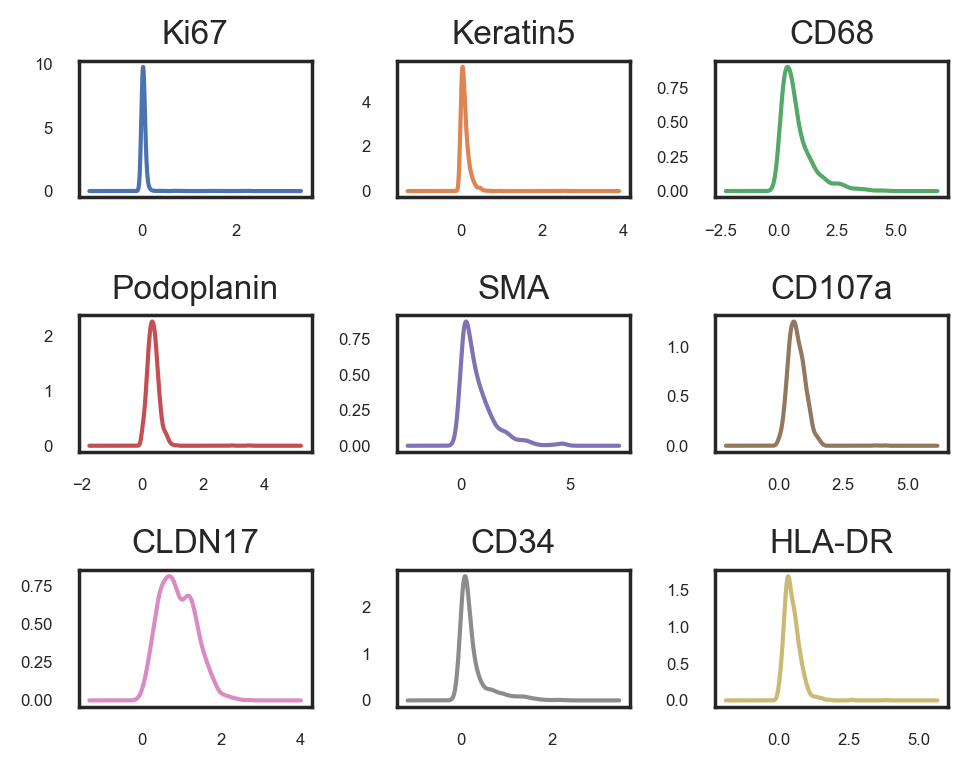

In [11]:
sm.pl.distPlot(adata, layer='log', markers=['Ki67', 'Keratin5', 'CD68', 'Podoplanin', 'SMA', 'CD107a',
       'CLDN17', 'CD34', 'HLA-DR'], ncols=3, fontsize=6, figsize=(5,4))


/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



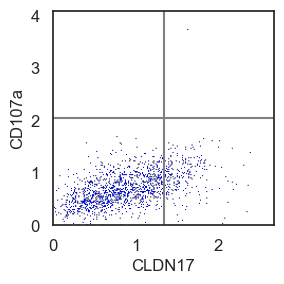

In [12]:
sm.pl.densityPlot2D(adata, markerA='CLDN17', markerB= 'CD107a', layer='log')

In [13]:
adata = sm.pp.rescale (adata, gate=gate)



Scaling Image: reg003_X01_Y01_Z01
Scaling Ki67 (gate: 0.418)
Scaling Keratin5 (gate: 0.241)
Scaling CD68 (gate: 1.747)
Scaling Podoplanin (gate: 0.488)
Scaling SMA (gate: 1.461)
Scaling CD107a (gate: 0.944)
Scaling CLDN17 (gate: 1.214)
Scaling CD34 (gate: 0.594)
Scaling HLA-DR (gate: 0.747)


/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:145: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [14]:
phenotype = pd.read_csv('/Users/jessica/Intership_ss2025/scimap/phenotype_workflow.csv', sep=';')
phenotype.style.format(na_rep='')


,Unnamed: 0,Unnamed: 1,CD68,SMA,Podoplanin,CD34,CD107a,Ki67,CLDN17,Keratin5,HLA-DR
0,all,SMA+,,pos,,,,,,,
1,all,Lymphatic cells,,,pos,,,,,,
2,all,Endothelial cells,,,,pos,,,,,
3,all,Epitheilial cells,,,,,,,,pos,
4,all,Activ CD8 T cells,,,,,pos,,,,
5,all,Macrophages,pos,,,,,,,,
6,all,HLA,,,,,,,,,pos
7,all,Ki67 +,,,,,,pos,,,
8,all,CLDN17 +,,,,,,,pos,,


In [15]:
adata = sm.tl.phenotype_cells (adata, phenotype=phenotype, label="phenotype") 

Phenotyping SMA+
Phenotyping Lymphatic cells
Phenotyping Endothelial cells
Phenotyping Epitheilial cells
Phenotyping Activ CD8 T cells
Phenotyping Macrophages
Phenotyping HLA
Phenotyping Ki67 +
Phenotyping CLDN17 +
Consolidating the phenotypes across all groups


/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [16]:
adata.obs['phenotype'].value_counts()


phenotype
Unknown              566
CLDN17 +             252
SMA+                 124
Endothelial cells    118
Lymphatic cells      108
Macrophages           97
Activ CD8 T cells     82
Epitheilial cells     56
HLA                   34
Ki67 +                11
Name: count, dtype: int64

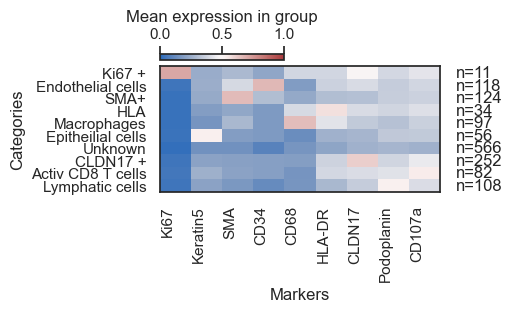

In [17]:
sm.pl.heatmap(adata, groupBy='phenotype', standardScale=None, figsize=(5,3), showPrevalence=True, vmin=0, vmax=1)


In [18]:
adata = sm.tl.umap(adata)


/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/umap.py:304: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



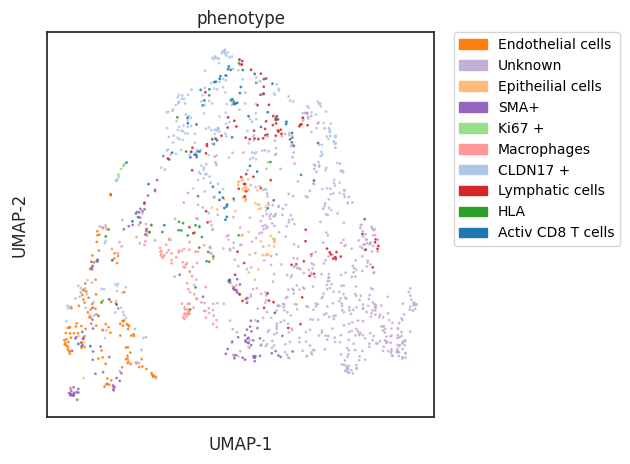

In [19]:
sm.pl.umap(adata, color=['phenotype'], s=1)


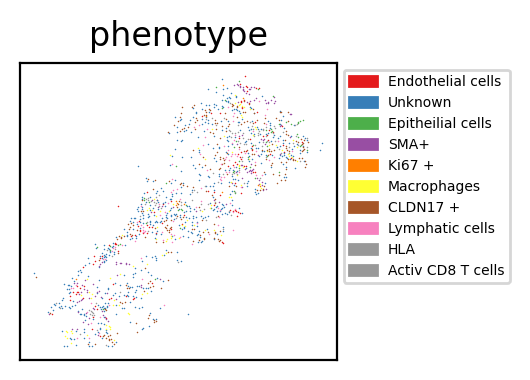

In [20]:
sm.pl.spatial_scatterPlot (adata, colorBy = ['phenotype'],figsize=(2.75,2), s=0.3, fontsize=5, catCmap='Set1')

In [21]:
image_path = '/Users/jessica/Intership_ss2025/scimap/reg003_X01_Y01_Z01.tif'
channel_names = ['DAPI', 'Ki67', 'Keratin5', 'CD68', 'Podoplanin', 'SMA',
                 'CD107a', 'CLDN17', 'CD34', 'HLA-DR']

# 可视化
sm.pl.image_viewer(
    image_path=image_path,
    adata=adata,
    overlay='phenotype',
    channel_names=channel_names,
    point_size=10,
    point_color='blue'
)
